### CSDA 1120 - Group 4 - Sprint 2 - Scenario 3

## 1. Preparing System

##### Install pymongo --> python -m pip install pymongo==3.12.0 On AC prompt shell
##### Import the MongoClient class from the pymongo library, to interact with a MongoDB database from Python.


### Install The Following Libraries
##### Pymongo, MongoClient, Pandas, Json, Pprint

In [63]:
from pymongo import MongoClient
from pandas import json_normalize
import json
from pprint import pprint as pp
import pandas as pd

##### Connect to studio 3T mongoDB Database from python

In [64]:
client = MongoClient ('mongodb://34.171.140.166:27017/Scenario3')

In [65]:
db=client.Scenario3
print (db)

Database(MongoClient(host=['34.171.140.166:27017'], document_class=dict, tz_aware=False, connect=True), 'Scenario3')


##### Use Mongoclient and cursor to connect to "restaurants.db"

In [66]:
with client:
    db = client.Scenario3
    #getCollection("restaurants")
    qresult1 = db.restaurants.find()
    print(type(qresult1))

<class 'pymongo.cursor.Cursor'>


##### Query and create a dataframe from "restaurants.db" as "df".

##### Normalize the dataframe into "df2"

In [67]:
res=list(qresult1)

df = pd.DataFrame.from_records(res)

df2 = pd.DataFrame.from_records(json_normalize(res))

# 1. Data Exploration

In [8]:
df2.describe()

,_id,borough,cuisine,grades,name,restaurant_id,address.building,address.coord,address.street,address.zipcode
count,25359,25359,25359,25359,25359,25359,25359,25359,25359,25359
unique,25359,6,85,23121,20470,25359,7990,22103,2790,213
top,646a22f720cec63db35433b0,Manhattan,American,[],Subway,30075445,1,"[-73.77813909999999, 40.6413111]",Broadway,10003
freq,1,10259,6183,738,421,1,209,84,928,686


In [9]:
df.columns

Index(['_id', 'address', 'borough', 'cuisine', 'grades', 'name',
       'restaurant_id'],
      dtype='object')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25359 entries, 0 to 25358
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               25359 non-null  object
 1   borough           25359 non-null  object
 2   cuisine           25359 non-null  object
 3   grades            25359 non-null  object
 4   name              25359 non-null  object
 5   restaurant_id     25359 non-null  object
 6   address.building  25359 non-null  object
 7   address.coord     25359 non-null  object
 8   address.street    25359 non-null  object
 9   address.zipcode   25359 non-null  object
dtypes: object(10)
memory usage: 1.9+ MB


In [164]:
# Establish connection to MongoDB server and select "Scenario3" database
with client:
    db = client.Scenario3

    # Count occurrences of each borough
    borough_counts = db.restaurants.aggregate([
        {"$group": {"_id": "$borough", "count": {"$sum": 1}}},
        {"$project": {"borough": "$_id", "count": 1, "_id": 0}}
    ])

    # Print borough counts
    print("Borough Counts:")
    for borough in borough_counts:
        borough_name = borough["borough"]
        count = borough["count"]
        print(f"{borough_name}: {count}")

Borough Counts:
Bronx: 2338
Brooklyn: 6086
Queens: 5656
Staten Island: 969
Manhattan: 10259
Missing: 51


# 2. Business Objectives
  #### 1.Optimize current restaurant locations/market presence based on demand.
  #### 2. Expand restaurant locations

# 3. Decisions

 1. Analyze the the performance of specific cuisine categories in New York and tailor the menu offerings and restaurant elements of current restaurant locations accordingly to maximize success.
 
 
 2. Develop targeted marketing campaigns and promotions that highlight the popular cuisine categories and their associated locations to attract customers.Find what is currently working in the market already.
 
 
 3. Asses the New York restaurant market, to find potential opportunities for new restaurant locations.


# 4. Business Questions

1. What are the most and least prevelant cuisines categories in New York?


2. What are the top 3 restaurants names in each borough? 


3.  Which borough shows the most demand/lowest competition for a potential opening of a new restaurant of a specific cuisine category?

# 5. Database Queries
   
   ## Q1: What are the most and least prevelant cuisines categories in New York?

In [87]:
# Establish connection to MongoDB server and select "Scenario3" database
with client:
    db = client.Scenario3
    
    # Aggregation pipeline query to find the top 5 cuisine categories with highest demand
    top_5_pipeline = [
        {"$group": {"_id": "$cuisine", "count": {"$sum": 1}}},
        {"$sort": {"count": -1}},
        {"$limit": 10},
        {"$project": {"_id": 0, "cuisine": "$_id", "count": 1}}
    ]

    top_5_cuisines = db.restaurants.aggregate(top_5_pipeline)

    print("The 10 most prevelant cuisine categories:")
    for cuisine in top_5_cuisines:
        cuisine_name = cuisine["cuisine"]
        cuisine_count = cuisine["count"]
        print(f"Cuisine: {cuisine_name}, Count: {cuisine_count}")

    print("\n----------------------------------\n")
    
    # Aggregation pipeline query to find the worst 5 cuisine categories with lowest demand
    worst_5_pipeline = [
        {"$group": {"_id": "$cuisine", "count": {"$sum": 1}}},
        {"$sort": {"count": 1}},
        {"$limit": 10},
        {"$project": {"_id": 0, "cuisine": "$_id", "count": 1}}
    ]

    worst_5_cuisines = db.restaurants.aggregate(worst_5_pipeline)

    print("The 10 least prevelant cuisine categories:")
    for cuisine in worst_5_cuisines:
        cuisine_name = cuisine["cuisine"]
        cuisine_count = cuisine["count"]
        print(f"Cuisine: {cuisine_name}, Count: {cuisine_count}")


The 10 most prevelant cuisine categories:
Cuisine: American, Count: 6183
Cuisine: Chinese, Count: 2418
Cuisine: Café/Coffee/Tea, Count: 1214
Cuisine: Pizza, Count: 1163
Cuisine: Italian, Count: 1069
Cuisine: Other, Count: 1011
Cuisine: Latin (Cuban, Dominican, Puerto Rican, South & Central American), Count: 850
Cuisine: Japanese, Count: 760
Cuisine: Mexican, Count: 754
Cuisine: Bakery, Count: 691

----------------------------------

The 10 least prevelant cuisine categories:
Cuisine: Polynesian, Count: 1
Cuisine: Californian, Count: 1
Cuisine: Chilean, Count: 1
Cuisine: Creole/Cajun, Count: 1
Cuisine: CafÃ©/Coffee/Tea, Count: 2
Cuisine: Iranian, Count: 2
Cuisine: Hawaiian, Count: 3
Cuisine: Soups, Count: 4
Cuisine: Czech, Count: 6
Cuisine: Nuts/Confectionary, Count: 6


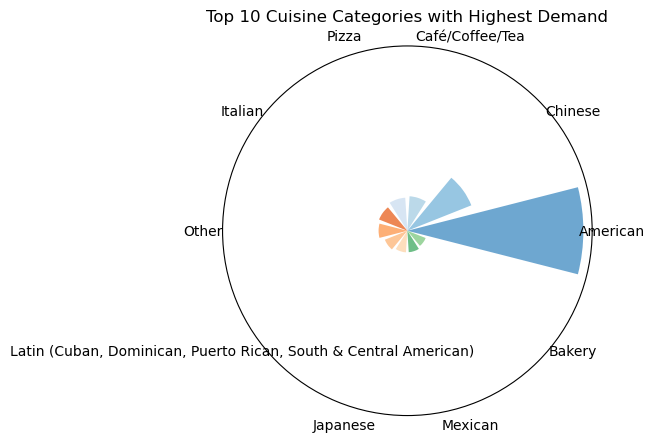


----------------------------------



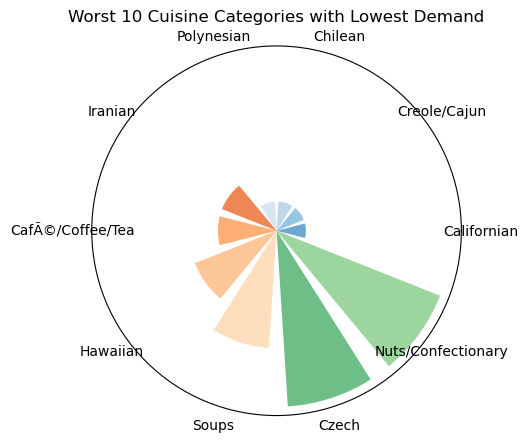

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot circular bar chart
def plot_circular_bar_chart(categories, counts, title):
    # Convert counts to integers
    counts = [int(count) for count in counts]

    # Calculate total count
    total_count = sum(counts)

    # Calculate percentages
    percentages = [count / total_count * 100 for count in counts]

    # Create figure and axis
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Set theta positions for each category
    theta = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

    # Plot the bars
    bars = ax.bar(theta, percentages, width=0.5, alpha=0.7)

    # Set colors for the bars
    cmap = plt.cm.get_cmap('tab20c')
    for i, bar in enumerate(bars):
        bar.set_facecolor(cmap(i))

    # Set the category labels
    ax.set_xticks(theta)
    ax.set_xticklabels(categories)

    # Set title
    ax.set_title(title)

    # Remove radial labels and grid
    ax.set_yticklabels([])
    ax.grid(False)

    # Show the plot
    plt.show()

# Establish connection to MongoDB server and select "Scenario3" database
with client:
    db = client.Scenario3
    
    # Aggregation pipeline query to find the top 10 cuisine categories with highest demand
    top_10_pipeline = [
        {"$group": {"_id": "$cuisine", "count": {"$sum": 1}}},
        {"$sort": {"count": -1}},
        {"$limit": 10},
        {"$project": {"_id": 0, "cuisine": "$_id", "count": {"$toString": "$count"}}}
    ]

    top_10_cuisines = db.restaurants.aggregate(top_10_pipeline)

    top_categories = []
    top_counts = []
    for cuisine in top_10_cuisines:
        top_categories.append(cuisine["cuisine"])
        top_counts.append(cuisine["count"])

    # Plot circular bar chart for top cuisine categories
    plot_circular_bar_chart(top_categories, top_counts, "Top 10 Cuisine Categories with Highest Demand")

    print("\n----------------------------------\n")

    # Aggregation pipeline query to find the worst 10 cuisine categories with lowest demand
    worst_10_pipeline = [
        {"$group": {"_id": "$cuisine", "count": {"$sum": 1}}},
        {"$sort": {"count": 1}},
        {"$limit": 10},
        {"$project": {"_id": 0, "cuisine": "$_id", "count": {"$toString": "$count"}}}
    ]

    worst_10_cuisines = db.restaurants.aggregate(worst_10_pipeline)

    worst_categories = []
    worst_counts = []
    for cuisine in worst_10_cuisines:
        worst_categories.append(cuisine["cuisine"])
        worst_counts.append(cuisine["count"])

    # Plot circular bar chart for worst cuisine categories
    plot_circular_bar_chart(worst_categories, worst_counts, "Worst 10 Cuisine Categories with Lowest Demand")


 ## Q2.What are the top 3 restaurant names in each borough?

In [9]:
 # Establish connection to MongoDB server and select "Scenario3" database/ List the boroughs
with client:
    db = client.Scenario3
    boroughs = ["Brooklyn", "Manhattan", "Staten Island", "Bronx", "Queens"]
    
# Aggregation pipeline query to retrieve top 3 rated restaurants for each borough.
    for borough in boroughs:
        print(f"Top 10 rated restaurants in {borough}:")
        qresult = db.restaurants.aggregate([
            {"$match": {"borough": borough}},
            {"$unwind": "$grades"},
            {"$sort": {"grades.score": -1}},
            {"$limit": 3},
            {"$project": {"_id": 0, "name": 1, "score": "$grades.score"}}
        ])
# Print Query Result
        for result in qresult:
            restaurant_name = result['name']
            score = result['score']
            print(f"{restaurant_name} - Score: {score}")

        print("------------------------")


Top 10 rated restaurants in Brooklyn:
D & Y Restaurant - Score: 86
Anella - Score: 81
Cheikh Umar Futiyu Restaurant - Score: 78
------------------------
Top 10 rated restaurants in Manhattan:
Murals On 54/Randolphs'S - Score: 131
Baluchi'S Indian Food - Score: 98
Bella Napoli - Score: 98
------------------------
Top 10 rated restaurants in Staten Island:
Oaxaca Deli And Taqueria - Score: 68
Luigi'S Dolceria - Score: 65
Greenleaf'S Grille - Score: 60
------------------------
Top 10 rated restaurants in Bronx:
La Potencia Restaurant - Score: 82
El Molino Rojo Restaurant - Score: 76
Zymi Bar & Grill - Score: 75
------------------------
Top 10 rated restaurants in Queens:
Spicy Shallot - Score: 84
Gal Bi Ma Eul - Score: 78
Los Mismo Restaurant - Score: 73
------------------------


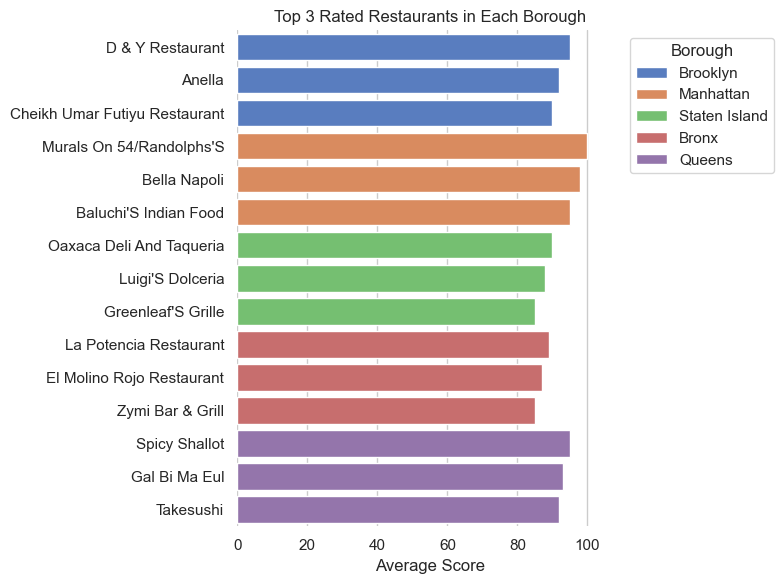

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the bar chart (example data)
boroughs = ['Brooklyn', 'Manhattan', 'Staten Island', 'Bronx', 'Queens']
restaurant_names = [
    ['D & Y Restaurant', 'Anella', 'Cheikh Umar Futiyu Restaurant'],
    ['Murals On 54/Randolphs\'S', 'Bella Napoli', 'Baluchi\'S Indian Food'],
    ['Oaxaca Deli And Taqueria', 'Luigi\'S Dolceria', 'Greenleaf\'S Grille'],
    ['La Potencia Restaurant', 'El Molino Rojo Restaurant', 'Zymi Bar & Grill'],
    ['Spicy Shallot', 'Gal Bi Ma Eul', 'Takesushi']
]
average_scores = [[95, 92, 90], [100, 98, 95], [90, 88, 85], [89, 87, 85], [95, 93, 92]]

# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

# Create a horizontal bar chart using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))

# Flatten the nested restaurant names and average scores for plotting
flat_names = [name for sublist in restaurant_names for name in sublist]
flat_scores = [score for sublist in average_scores for score in sublist]

# Create a color palette for the bars
colors = sns.color_palette("muted", n_colors=5)

# Plot the horizontal bars
sns.barplot(x=flat_scores, y=flat_names, hue=np.repeat(boroughs, 3),
            palette=colors, dodge=False, ax=ax)

# Customize the plot
ax.set(xlim=(0, max(flat_scores) + 10), ylabel="", xlabel="Average Score")
sns.despine(left=True, bottom=True)
ax.legend(title="Borough", bbox_to_anchor=(1, 1), loc="upper left")
ax.set_title("Top 3 Rated Restaurants in Each Borough")
# Show the plot
plt.tight_layout()
plt.show()


## Q3. Which borough shows the most demand/lowest competition for a potential opening of a new restaurant of a specific cuisine category?

### Total number of ratings in the dataset

In [91]:
# Establish connection to MongoDB server and select "Scenario3" database
with client:
    db = client.Scenario3
    
    # Count the total number of ratings in the dataset
    total_ratings = db.restaurants.aggregate([
        {"$project": {"ratings_count": {"$size": "$grades"}}},
        {"$group": {"_id": None, "total_ratings": {"$sum": "$ratings_count"}}}
    ])

    # Extract the total number of ratings from the result
    total_ratings = list(total_ratings)[0]['total_ratings']

    print("Total number of ratings in the dataset:", total_ratings)


Total number of ratings in the dataset: 93463


### Total number of ratings in each cuisine category / Top 15

In [166]:
# Establish connection to MongoDB server and select "Scenario3" database
with client:
    db = client.Scenario3
    
    # Aggregation pipeline to count the number of ratings for each cuisine category
    pipeline = [
        {"$unwind": "$grades"},
        {"$group": {"_id": "$cuisine", "count": {"$sum": 1}}},
        {"$sort": {"count": -1}},
        {"$limit": 15}
    ]
    
    # Retrieve the top 15 cuisine categories with the highest number of ratings
    top_cuisines = list(db.restaurants.aggregate(pipeline))
    
    # Update the pipeline to sort in ascending order for the bottom 10
    pipeline[2]["$sort"] = {"count": 1}
    
    # Retrieve the bottom 10 cuisine categories with the lowest number of ratings
    bottom_cuisines = list(db.restaurants.aggregate(pipeline))
    
    # Print the total number of ratings in each cuisine category
    print("Top 15 Cuisine Categories by Ratings:")
    for i, cuisine in enumerate(top_cuisines, start=1):
        cuisine_name = cuisine["_id"]
        rating_count = cuisine["count"]
        print(f"{i}. Cuisine: {cuisine_name}, Ratings: {rating_count}")

    print("\n----------------------------------\n")
    


Top 15 Cuisine Categories by Ratings:
1. Cuisine: American, Ratings: 23491
2. Cuisine: Chinese, Ratings: 9349
3. Cuisine: Pizza, Ratings: 4698
4. Cuisine: Italian, Ratings: 4340
5. Cuisine: Café/Coffee/Tea, Ratings: 4047
6. Cuisine: Latin (Cuban, Dominican, Puerto Rican, South & Central American), Ratings: 3830
7. Cuisine: Mexican, Ratings: 2973
8. Cuisine: Japanese, Ratings: 2908
9. Cuisine: Bakery, Ratings: 2873
10. Cuisine: Caribbean, Ratings: 2613
11. Cuisine: Spanish, Ratings: 2092
12. Cuisine: Pizza/Italian, Ratings: 1875
13. Cuisine: Donuts, Ratings: 1855
14. Cuisine: Hamburgers, Ratings: 1760
15. Cuisine: Sandwiches, Ratings: 1718

----------------------------------



### Top 15 cuisine categories with highest ratings and at least (1718) ratings / for entire dataset

In [107]:
# Establish connection to MongoDB server and select "Scenario3" database
with client:
    db = client.Scenario3

    # Minimum number of ratings required for a cuisine category to be considered
    min_ratings = 1718
    
    # Aggregation pipeline query to calculate the rating for each cuisine category
    pipeline = [
        {"$unwind": "$grades"},
        {"$group": {"_id": "$cuisine", "rating": {"$avg": "$grades.score"}, "count": {"$sum": 1}}},
        {"$match": {"count": {"$gte": min_ratings}}},
        {"$sort": {"rating": -1}},
        {"$project": {"_id": 0, "cuisine": "$_id", "rating": {"$round": ["$rating", 2]}}}
    ]
    
    cuisine_ratings = list(db.restaurants.aggregate(pipeline))

    print("Top 15 cuisine categories with highest ratings and at least 1718 ratings:")
    for i, cuisine in enumerate(cuisine_ratings[:15], start=1):
        cuisine_name = cuisine["cuisine"]
        rating = cuisine["rating"]
        print(f"{i}. Cuisine: {cuisine_name}, Rating: {rating}")

    print("\n----------------------------------\n")
    



Top 15 cuisine categories with highest ratings and at least 1718 ratings:
1. Cuisine: Latin (Cuban, Dominican, Puerto Rican, South & Central American), Rating: 13.04
2. Cuisine: Japanese, Rating: 12.87
3. Cuisine: Chinese, Rating: 12.79
4. Cuisine: Spanish, Rating: 12.55
5. Cuisine: Mexican, Rating: 12.55
6. Cuisine: Caribbean, Rating: 12.17
7. Cuisine: Pizza/Italian, Rating: 11.95
8. Cuisine: Italian, Rating: 11.91
9. Cuisine: Bakery, Rating: 11.39
10. Cuisine: Pizza, Rating: 11.26
11. Cuisine: American, Rating: 11.05
12. Cuisine: Hamburgers, Rating: 9.54
13. Cuisine: Sandwiches, Rating: 8.67
14. Cuisine: Café/Coffee/Tea, Rating: 8.67
15. Cuisine: Donuts, Rating: 8.31

----------------------------------



### Top 5 cuisines in each borough based on amount of ratings available

In [114]:
pipeline = [
    {"$match": {"borough": {"$nin": ["", "Missing"]}}},
    {"$unwind": "$grades"},
    {"$group": {"_id": {"borough": "$borough", "cuisine": "$cuisine"}, "total_ratings": {"$sum": 1}}},
    {"$sort": {"total_ratings": -1}},
    {"$group": {"_id": "$_id.borough", "cuisine_ratings": {"$push": {"cuisine": "$_id.cuisine", "total_ratings": "$total_ratings"}}}}
]


borough_cuisine_ratings = list(db.restaurants.aggregate(pipeline))

for borough in borough_cuisine_ratings:
    borough_name = borough["_id"]
    cuisine_ratings = borough["cuisine_ratings"]
    print(f"Borough: {borough_name}")
    top_cuisines = sorted(cuisine_ratings, key=lambda x: x["total_ratings"], reverse=True)[:5]
    for cuisine in top_cuisines:
        cuisine_name = cuisine["cuisine"]
        total_ratings = cuisine["total_ratings"]
        print(f"Cuisine: {cuisine_name}, Total Ratings: {total_ratings}")
    print("----------------------------------")


Borough: Brooklyn
Cuisine: American, Total Ratings: 4695
Cuisine: Chinese, Total Ratings: 2981
Cuisine: Caribbean, Total Ratings: 1283
Cuisine: Pizza, Total Ratings: 1196
Cuisine: Café/Coffee/Tea, Total Ratings: 929
----------------------------------
Borough: Bronx
Cuisine: American, Total Ratings: 1561
Cuisine: Chinese, Total Ratings: 1296
Cuisine: Latin (Cuban, Dominican, Puerto Rican, South & Central American), Total Ratings: 824
Cuisine: Pizza, Total Ratings: 788
Cuisine: Caribbean, Total Ratings: 440
----------------------------------
Borough: Staten Island
Cuisine: American, Total Ratings: 850
Cuisine: Chinese, Total Ratings: 287
Cuisine: Italian, Total Ratings: 273
Cuisine: Pizza/Italian, Total Ratings: 214
Cuisine: Pizza, Total Ratings: 185
----------------------------------
Borough: Manhattan
Cuisine: American, Total Ratings: 12452
Cuisine: Italian, Total Ratings: 2622
Cuisine: Café/Coffee/Tea, Total Ratings: 2320
Cuisine: Chinese, Total Ratings: 2058
Cuisine: Japanese, Total 

## Average rating score / considering total rating count for cuisines on various boroughs

In [165]:
# Establish connection to MongoDB server and select "Scenario3" database
with client:
    db = client.Scenario3

    # Minimum number of ratings required for a cuisine category to be considered
    min_ratings = {"Staten Island": 250, "Bronx": 500, "default": 1000}
    
    # List of boroughs
    boroughs = ["Brooklyn", "Queens", "Manhattan", "Staten Island", "Bronx"]
    
    for borough in boroughs:
        print(f"\n------ {borough} ------\n")
        
        # Get the minimum rating count based on borough
        min_rating_count = min_ratings.get(borough, min_ratings["default"])
        
        # Aggregation pipeline query to calculate the average rating for each cuisine category in the current borough
        pipeline = [
            {"$match": {"borough": borough}},
            {"$unwind": "$grades"},
            {"$group": {"_id": "$cuisine", "rating": {"$avg": "$grades.score"}, "count": {"$sum": 1}}},
            {"$match": {"count": {"$gte": min_rating_count}}},
            {"$sort": {"rating": -1}},
            {"$project": {"_id": 0, "cuisine": "$_id", "rating": {"$round": ["$rating", 2]}}}
        ]
        
        cuisine_ratings = list(db.restaurants.aggregate(pipeline))

        print("Top 5 cuisine categories with highest ratings:")
        for i, cuisine in enumerate(cuisine_ratings[:5], start=1):
            cuisine_name = cuisine["cuisine"]
            rating = cuisine["rating"]
            print(f"{i}. Cuisine: {cuisine_name}, Rating: {rating}")

        print("\n")

        print("Worst 5 cuisine categories with lowest ratings:")
        lowest_ratings = sorted(cuisine_ratings, key=lambda x: x["rating"])[:5]
        for i, cuisine in enumerate(lowest_ratings, start=1):
            cuisine_name = cuisine["cuisine"]
            rating = cuisine["rating"]
            print(f"{i}. Cuisine: {cuisine_name}, Rating: {rating}")



------ Brooklyn ------

Top 5 cuisine categories with highest ratings:
1. Cuisine: Caribbean, Rating: 12.38
2. Cuisine: Chinese, Rating: 12.36
3. Cuisine: Pizza, Rating: 11.08
4. Cuisine: American, Rating: 11.04


Worst 5 cuisine categories with lowest ratings:
1. Cuisine: American, Rating: 11.04
2. Cuisine: Pizza, Rating: 11.08
3. Cuisine: Chinese, Rating: 12.36
4. Cuisine: Caribbean, Rating: 12.38

------ Queens ------

Top 5 cuisine categories with highest ratings:
1. Cuisine: Latin (Cuban, Dominican, Puerto Rican, South & Central American), Rating: 12.99
2. Cuisine: Chinese, Rating: 12.89
3. Cuisine: Pizza, Rating: 11.2
4. Cuisine: American, Rating: 10.82


Worst 5 cuisine categories with lowest ratings:
1. Cuisine: American, Rating: 10.82
2. Cuisine: Pizza, Rating: 11.2
3. Cuisine: Chinese, Rating: 12.89
4. Cuisine: Latin (Cuban, Dominican, Puerto Rican, South & Central American), Rating: 12.99

------ Manhattan ------

Top 5 cuisine categories with highest ratings:
1. Cuisine: C

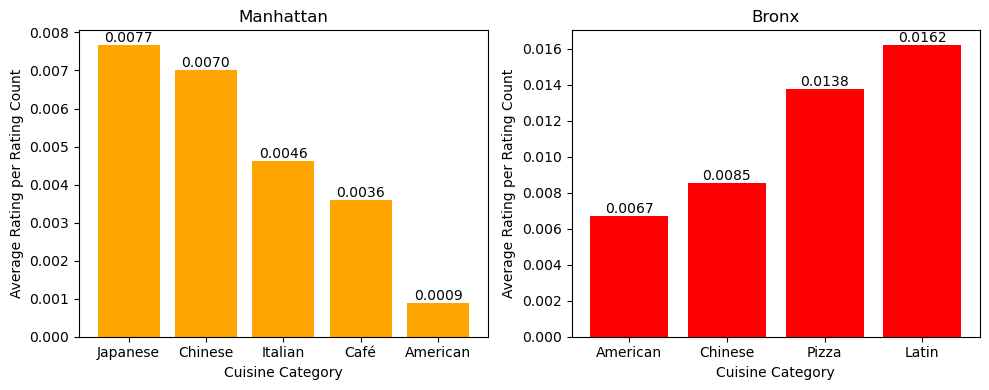

In [187]:
import matplotlib.pyplot as plt

# Define the cuisine categories and their respective average ratings and rating counts for Manhattan
cuisine_categories_manhattan = ["Japanese", "Chinese", "Italian", "Pizza", "Café", "American", "French"]
average_ratings_manhattan = [13.08, 14.44, 12.11, 11.66, 8.35, 11.18, 11.39]
rating_counts_manhattan = [1705, 2058, 2622, None, 2320, 12452, None]

# Calculate the average rating per rating count for each cuisine category in Manhattan
average_rating_per_count_manhattan = []
for rating, count in zip(average_ratings_manhattan, rating_counts_manhattan):
    if count is not None:
        average_rating_per_count_manhattan.append(rating / count)
    else:
        average_rating_per_count_manhattan.append(None)

# Remove cuisine categories with missing rating counts
cuisine_categories_manhattan = [category for category, count in zip(cuisine_categories_manhattan, rating_counts_manhattan) if count is not None]
average_rating_per_count_manhattan = [score for score in average_rating_per_count_manhattan if score is not None]

# Define the cuisine categories and their respective average ratings and rating counts for the Bronx
cuisine_categories_bronx = ["American", "Chinese", "Pizza", "Latin"]
average_ratings_bronx = [10.47, 11.04, 10.85, 13.36]
rating_counts_bronx = [1561, 1296, 788, 824]

# Calculate the average rating per rating count for each cuisine category in the Bronx
average_rating_per_count_bronx = [rating / count for rating, count in zip(average_ratings_bronx, rating_counts_bronx)]

# Set up the subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the data for Manhattan with orange bars
axs[0].bar(cuisine_categories_manhattan, average_rating_per_count_manhattan, color='orange')
axs[0].set_xlabel("Cuisine Category")
axs[0].set_ylabel("Average Rating per Rating Count")
axs[0].set_title("Manhattan")

# Add labels for each data point in Manhattan
for i in range(len(cuisine_categories_manhattan)):
    axs[0].text(cuisine_categories_manhattan[i], average_rating_per_count_manhattan[i] + 0.000001, f"{average_rating_per_count_manhattan[i]:.4f}", ha="center", va="bottom")

# Plot the data for the Bronx with red bars
axs[1].bar(cuisine_categories_bronx, average_rating_per_count_bronx, color='red')
axs[1].set_xlabel("Cuisine Category")
axs[1].set_ylabel("Average Rating per Rating Count")
axs[1].set_title("Bronx")

# Add labels for each data point in the Bronx
for i in range(len(cuisine_categories_bronx)):
    axs[1].text(cuisine_categories_bronx[i], average_rating_per_count_bronx[i] + 0.0000001, f"{average_rating_per_count_bronx[i]:.4f}", ha="center", va="bottom")

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()


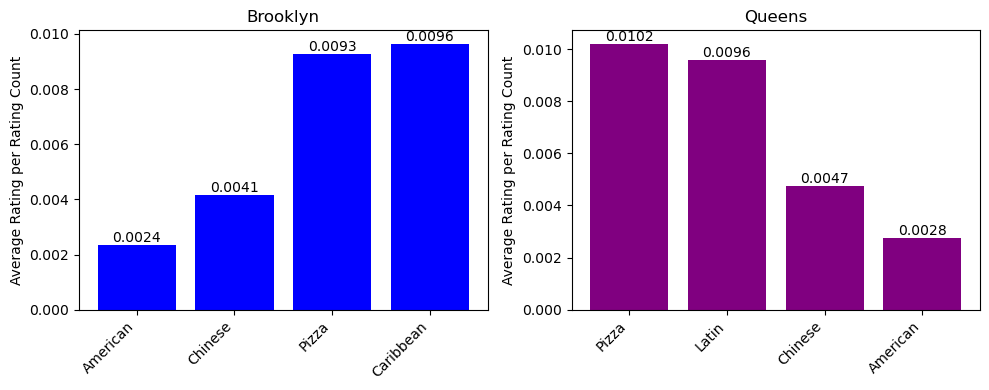

In [215]:
import matplotlib.pyplot as plt
import numpy as np

# Define the cuisine categories and their respective average ratings and rating counts for Brooklyn
cuisine_categories_brooklyn = ["Caribbean", "Chinese", "American", "Pizza"]
average_ratings_brooklyn = [12.38, 12.36, 11.04, 11.08]
rating_counts_brooklyn = [1283, 2981, 4695, 1196]

# Calculate the average rating per rating count for each cuisine category in Brooklyn
average_rating_per_count_brooklyn = [rating / count for rating, count in zip(average_ratings_brooklyn, rating_counts_brooklyn)]

# Sort the cuisine categories and their average ratings in ascending order
sorted_indices_brooklyn = np.argsort(average_rating_per_count_brooklyn)
cuisine_categories_brooklyn = [cuisine_categories_brooklyn[i] for i in sorted_indices_brooklyn]
average_rating_per_count_brooklyn = [average_rating_per_count_brooklyn[i] for i in sorted_indices_brooklyn]

# Define the cuisine categories and their respective average ratings and rating counts for Queens
cuisine_categories_queens = ["Latin", "Chinese", "American", "Pizza"]
average_ratings_queens = [12.99, 12.89, 10.82, 11.2]
rating_counts_queens = [1354, 2719, 3916, 1097]

# Calculate the average rating per rating count for each cuisine category in Queens
average_rating_per_count_queens = [rating / count for rating, count in zip(average_ratings_queens, rating_counts_queens)]

# Sort the cuisine categories and their average ratings in descending order
sorted_indices_queens = np.argsort(average_rating_per_count_queens)[::-1]  # Reverse the order
cuisine_categories_queens = [cuisine_categories_queens[i] for i in sorted_indices_queens]
average_rating_per_count_queens = [average_rating_per_count_queens[i] for i in sorted_indices_queens]

# Set up the subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the data for Brooklyn with green bars
axs[0].bar(np.arange(len(cuisine_categories_brooklyn)), average_rating_per_count_brooklyn, color='blue')
axs[0].set_xticks(np.arange(len(cuisine_categories_brooklyn)))
axs[0].set_xticklabels(cuisine_categories_brooklyn, rotation=45, ha="right")
axs[0].set_ylabel("Average Rating per Rating Count")
axs[0].set_title("Brooklyn")

# Add labels for each data point in Brooklyn
for i in range(len(cuisine_categories_brooklyn)):
    axs[0].text(i, average_rating_per_count_brooklyn[i] + 0.000001, f"{average_rating_per_count_brooklyn[i]:.4f}", ha="center", va="bottom")

# Plot the data for Queens with purple bars
axs[1].bar(np.arange(len(cuisine_categories_queens)), average_rating_per_count_queens, color='purple')
axs[1].set_xticks(np.arange(len(cuisine_categories_queens)))
axs[1].set_xticklabels(cuisine_categories_queens, rotation=45, ha="right")
axs[1].set_ylabel("Average Rating per Rating Count")
axs[1].set_title("Queens")

# Add labels for each data point in Queens
for i in range(len(cuisine_categories_queens)):
    axs[1].text(i, average_rating_per_count_queens[i] + 0.0000001, f"{average_rating_per_count_queens[i]:.4f}", ha="center", va="bottom")

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()


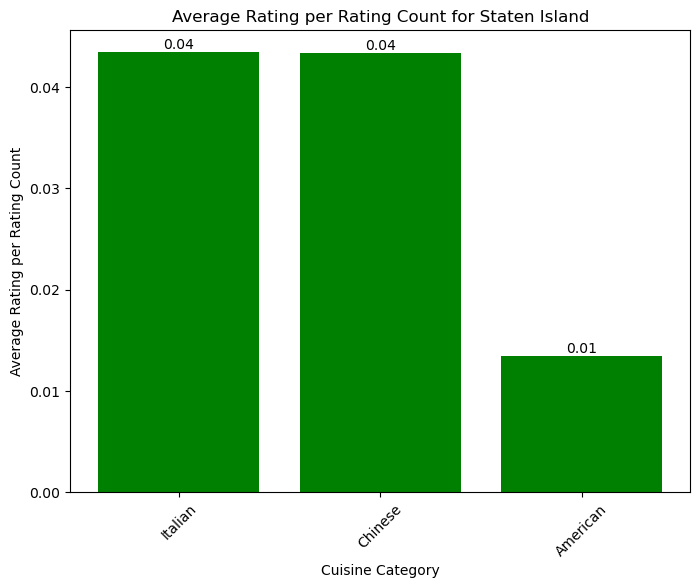

In [219]:
import matplotlib.pyplot as plt

# Define the cuisine categories and their respective average ratings and rating counts for Staten Island
cuisine_categories_staten_island = ["American", "Chinese", "Italian", "Pizza/Italian", "Pizza"]
average_ratings_staten_island = [11.44, 12.45, 11.86, None, None]  # Fill in the average ratings for each cuisine category
rating_counts_staten_island = [850, 287, 273, 214, 185]  # Fill in the rating counts for each cuisine category

# Calculate the average rating per rating count for each cuisine category in Staten Island
average_rating_per_count_staten_island = []
for rating, count in zip(average_ratings_staten_island, rating_counts_staten_island):
    if rating is not None and count is not None:
        average_rating_per_count_staten_island.append(rating / count)
    else:
        average_rating_per_count_staten_island.append(None)

# Remove cuisine categories with missing average ratings or rating counts
cuisine_categories_staten_island = [category for category, rating, count in zip(cuisine_categories_staten_island, average_ratings_staten_island, rating_counts_staten_island) if rating is not None and count is not None]
average_rating_per_count_staten_island = [score for score in average_rating_per_count_staten_island if score is not None]

# Sort the cuisine categories and average ratings in descending order
sorted_data = sorted(zip(cuisine_categories_staten_island, average_rating_per_count_staten_island), key=lambda x: x[1], reverse=True)
cuisine_categories_staten_island, average_rating_per_count_staten_island = zip(*sorted_data)

# Set up the bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(cuisine_categories_staten_island)), average_rating_per_count_staten_island, color='green')

# Add labels for each data point
for i in range(len(cuisine_categories_staten_island)):
    plt.text(i, average_rating_per_count_staten_island[i], f"{average_rating_per_count_staten_island[i]:.2f}", ha="center", va="bottom")

# Customize the chart appearance
plt.xticks(range(len(cuisine_categories_staten_island)), cuisine_categories_staten_island, rotation=45)
plt.ylabel("Average Rating per Rating Count")
plt.xlabel("Cuisine Category")
plt.title("Average Rating per Rating Count for Staten Island")

# Show the plot
plt.show()


### Correlate average rating per rating count vs total cuisine restaurant saturation in each borough